## Construct and compile model

In [1]:
%%bash
mkdir -p ./ex_toy01

In [2]:
%%bash
cat > ./ex_toy01/normal.stan << EOF
// DATA BLOCK | inputs to the model
data {
    int<lower=1> N; // number of data points; lower = 1 means to constrain N > 0
    real X[N];      // X[i] = gene expression for individual i
}

// PARAMETERS block = latent variables
parameters {
    real mu;                 // mu = mean expression value
    real<lower=0.001> sigma; // sigma = variance of expression values <lower=0.001> constrains sigma > 0
}

// MODEL BLOCK = priors and likelihoods
model {
    mu ~ normal(0,10);
    sigma ~ inv_gamma(1,1);
    for (i in 1:N) X[i] ~ normal(mu, sigma);
}
EOF

In [24]:
%%bash
cat > ./ex_toy01/normal.stan << EOF
data {
    int<lower=1> N;
    real X[N];
}

parameters {
    real mu;
    real<lower=0.001> sigma;
}

model {
    mu ~ normal(0,10);
    sigma ~ inv_gamma(1,1);
    for (i in 1:N) X[i] ~ normal(mu, sigma);
}
EOF

In [25]:
%%bash
### load modules
module load gcc
module load tbb

### set directory
STAN_PATH=/data/reddylab/Kuei/exe/cmdstan
FD_WRK=$(pwd)
echo $FD_WRK

### compile model
make -C $STAN_PATH ${FD_WRK}/ex_toy01/normal

/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan
make: Entering directory `/gpfs/fs1/data/reddylab/Kuei/exe/cmdstan'

--- Translating Stan model to C++ code ---
bin/stanc  --o=/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.hpp /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include   -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_5.7.0/include    -DBOOST_DISABLE_ASSERTS         -c -Wno-ignored-attributes   -x c++ -o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/

## Generate data

In [1]:
import numpy as np
import json

In [2]:
### simulation
np.random.seed(123)
neg = np.random.normal(loc=-1, scale=0.3, size=50)
print("Mean:", np.around(neg.mean(), 2))
print("SD:  ", np.around(neg.std(),  2))

Mean: -1.0
SD:   0.36


In [6]:
### generate data file
dct = dict()
dct["N"] = 50
dct["X"] = neg.tolist()

### store the data
fpath = "./ex_toy01/inputs.json"
with open(fpath, "w") as file:
    json.dump(dct, file)

In [7]:
%%bash
cat ./ex_toy01/inputs.json

{"N": 50, "X": [-1.3256891809901683, -0.7007963660249243, -0.9151064505844024, -1.4518884141754276, -1.173580075590561, -0.5045690388708547, -1.7280037730179223, -1.1286737886568532, -0.6202191223883398, -1.2600221206795306, -1.2036658454866163, -1.0284126906810673, -0.5525831121627136, -1.1916705990053953, -1.1331945878938197, -1.1303053826855551, -0.33822097518236327, -0.343964173307864, -0.6987838306363369, -0.8841440802475432, -0.7787894272311273, -0.5527803915547603, -1.2807501605207174, -0.647251286565369, -1.3761642003247037, -1.1913254507360231, -0.7278684412599097, -1.4286042100677907, -1.0420206160566, -1.2585264687579056, -1.076685811159179, -1.8395767316382172, -1.5314599313529542, -1.2099631703793752, -0.7217612704724252, -1.0520907048370647, -0.9991462252309566, -0.7935331866693145, -1.2638609029027155, -0.9149118028578127, -1.2416099554196847, -1.5183008482361822, -1.1172699381265303, -0.8278582412784827, -0.8984232847000595, -1.0035491483436458, -0.2822904202186822, -0.

## Running the model

In [14]:
%%bash
cat > ./ex_toy01/init.json << EOF
{
    "mu" :   -0.67,
    "sigma":  2.5
}
EOF

after several testing, 
- init.json, init.txt --- passed
- output.txt, output.csv --- passed
- inputs.json ---passed
- inputs.txt --- failed
    - Error: Exception: variable does not exist

In [15]:
%%bash
module load gcc
./ex_toy01/normal sample \
    thin=1 num_samples=1000 num_warmup=50 \
    init=./ex_toy01/init.json \
    data file=./ex_toy01/inputs.json \
    output file=./ex_toy01/output.csv

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./ex_toy01/inputs.json
init = ./ex_toy01/init.json
random
  seed = 2996367183 (Default)
output
  file = ./ex_toy01/output.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 3.7e-05 seconds
100

In [16]:
import pandas as pd

In [18]:
dat = pd.read_csv("./ex_toy01/output.csv", comment='#')
dat.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma
0,23.4146,1.000000,0.048678,2,3,0,-22.9104,-0.937924,0.416687
1,23.7135,0.975547,0.048678,2,7,0,-21.0652,-1.042000,0.328202
2,23.7220,0.843871,0.048678,1,3,0,-19.9682,-1.070290,0.375400
3,23.1078,0.953922,0.048678,2,7,0,-22.3241,-0.928821,0.422067
4,23.4930,0.991094,0.048678,2,7,0,-22.4581,-1.062140,0.336925


<AxesSubplot:>

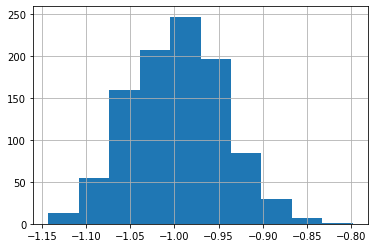

In [19]:
dat.mu.hist()

https://github.com/stan-dev/cmdstanpy/issues/26
```
import arviz as az
# input a list of filepaths or glob string (takes * or [0-9])
idata = az.from_cmdstan(posterior="path/to/files/model_output_[0-9].csv")
# traceplot
az.plot_trace(idata)
# summary
summary = az.summary(idata)
```

In [2]:
import arviz as az
# input a list of filepaths or glob string (takes * or [0-9])
#idata = az.from_cmdstan(posterior="path/to/files/model_output_[0-9].csv")

In [7]:
idata = az.from_cmdstan(posterior="./ex_toy01/output.csv")
idata

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

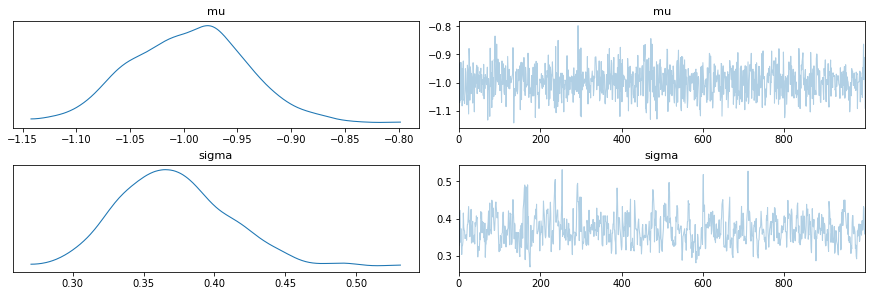

In [4]:
# traceplot
az.plot_trace(idata)

In [5]:
# summary
summary = az.summary(idata)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [6]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.996,0.053,-1.092,-0.898,0.002,0.001,1161.0,767.0,NaN
sigma,0.372,0.039,0.303,0.445,0.002,0.002,303.0,360.0,NaN


In [8]:
idata.posterior.data_vars.get

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000)
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    mu       (chain, draw) float64 -0.9379 -1.042 -1.07 ... -0.9105 -1.09
    sigma    (chain, draw) float64 0.4167 0.3282 0.3754 ... 0.374 0.3584 0.3681
Attributes: (12/39)
    created_at:             2021-06-09T19:09:59.488097
    arviz_version:          0.11.2
    algorithm:              ['hmc']
    comments:               ['# stan_version_major = 2\n# stan_version_minor ...
    delta:                  ['0.8']
    diagnostic_file:        ['None']
    ...                     ...
    t0:                     ['10']
    term_buffer:            ['50']
    thin:                   ['1']
    total_time_seconds:     ['0.069']
    warmup_time_seconds:    ['0.003']
    window:                 ['25']

In [12]:
idata.posterior.data_vars.get("mu")

<xarray.DataArray 'mu' (chain: 1, draw: 1000)>
array([[-0.937924, -1.042   , -1.07029 , -0.928821, -1.06214 , -0.928153,
        -1.05957 , -0.949473, -1.08207 , -1.05746 , -0.95366 , -0.923145,
        -1.06172 , -1.05922 , -1.07374 , -1.04176 , -0.950368, -0.963381,
        -1.02906 , -1.04569 , -1.07867 , -0.938018, -0.953604, -1.03822 ,
        -1.11077 , -0.878951, -0.916715, -1.06174 , -0.943953, -0.960223,
        -1.03859 , -0.966901, -0.979325, -1.00809 , -1.07199 , -0.929279,
        -0.975502, -1.01083 , -1.10319 , -0.968506, -1.01619 , -1.00279 ,
        -1.00126 , -0.95348 , -0.938328, -1.03861 , -0.94502 , -0.94502 ,
        -1.01989 , -0.972866, -0.995022, -1.03102 , -0.959924, -0.968986,
        -0.948733, -1.03479 , -0.970817, -1.00577 , -0.98953 , -1.00388 ,
        -1.04554 , -0.935079, -1.05707 , -0.983551, -1.02112 , -0.971405,
        -0.978839, -0.985947, -1.00705 , -0.991722, -0.945014, -1.13232 ,
        -1.01734 , -0.985785, -1.01979 , -1.02714 , -1.11906 , -0.877911,
        -1.01405 , -0.989263, -0.965545, -1.08785 , -0.922823, -1.05875 ,
        -0.997543, -0.982216, -1.04829 , -0.918073, -0.92702 , -0.83489 ,
        -1.04195 , -1.01521 , -0.980602, -0.863493, -0.984168, -0.997101,
        -0.91641 , -0.955775, -1.00652 , -0.928815, -0.991043, -1.02818 ,
        -0.971495, -0.999149, -1.00733 , -1.06961 , -0.923106, -0.972412,
        -1.00559 , -0.933142, -0.956629, -1.02982 , -1.04123 , -0.948311,
        -1.00748 , -0.94021 , -1.08478 , -0.998971, -0.992706, -1.01292 ,
...
        -0.972703, -0.949956, -0.968151, -1.00211 , -1.04538 , -0.957587,
        -1.01519 , -1.06663 , -1.0698  , -0.994567, -0.991202, -0.993386,
        -1.00548 , -0.981471, -1.0296  , -1.05955 , -0.949389, -0.973252,
        -0.968329, -0.91915 , -1.03098 , -1.06722 , -1.00365 , -0.988458,
        -1.00659 , -1.00556 , -0.932438, -1.05019 , -1.08642 , -0.960228,
        -0.973196, -0.972986, -0.919704, -1.04774 , -0.947965, -1.00903 ,
        -0.980446, -1.01723 , -0.965074, -0.976621, -0.976621, -0.974474,
        -0.977893, -1.02589 , -1.0214  , -1.04897 , -0.969722, -1.01373 ,
        -0.993621, -0.989639, -0.974761, -0.977953, -1.00262 , -1.00835 ,
        -1.01162 , -1.05553 , -0.947117, -1.00452 , -1.01724 , -0.962836,
        -1.01248 , -0.972402, -1.04413 , -0.959164, -1.00882 , -0.981356,
        -0.943116, -1.05488 , -1.04571 , -0.936407, -1.02919 , -0.965366,
        -1.0246  , -0.979616, -0.993296, -0.997222, -1.01357 , -1.0623  ,
        -1.01468 , -1.10315 , -1.07762 , -1.      , -1.03956 , -1.0463  ,
        -0.950221, -0.979381, -0.959052, -0.992076, -1.00994 , -0.996415,
        -0.965561, -1.01936 , -0.987482, -1.00246 , -1.02755 , -0.962479,
        -0.972565, -0.967372, -1.09179 , -1.00087 , -0.997743, -0.997743,
        -0.994659, -0.968063, -0.959053, -1.06786 , -0.964388, -1.04161 ,
        -0.998852, -0.98183 , -1.05211 , -0.947098, -0.966861, -0.863562,
        -0.989248, -0.968205, -0.910516, -1.09034 ]])
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [13]:
x = idata.posterior.data_vars.get("mu")
type(x)

xarray.core.dataarray.DataArray

In [16]:
x = x.to_series()
type(x)

pandas.core.series.Series

In [17]:
x

chain  draw
0      0      -0.937924
       1      -1.042000
       2      -1.070290
       3      -0.928821
       4      -1.062140
                 ...   
       995    -0.863562
       996    -0.989248
       997    -0.968205
       998    -0.910516
       999    -1.090340
Name: mu, Length: 1000, dtype: float64

In [18]:
import matplotlib.pyplot as plt

(array([ 13.,  55., 160., 207., 247., 196.,  85.,  29.,   7.,   1.]),
 array([-1.14248  , -1.1080391, -1.0735982, -1.0391573, -1.0047164,
        -0.9702755, -0.9358346, -0.9013937, -0.8669528, -0.8325119,
        -0.798071 ]),
 <BarContainer object of 10 artists>)

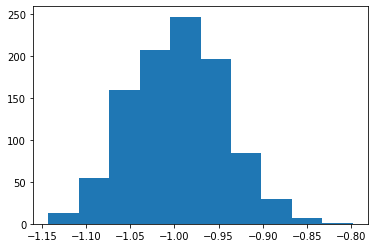

In [19]:
plt.hist(x)